训练集特征形状: (142, 13)
测试集特征形状: (36, 13)
训练集标签形状: (142,)
测试集标签形状: (36,)
最佳参数: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
混淆矩阵:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


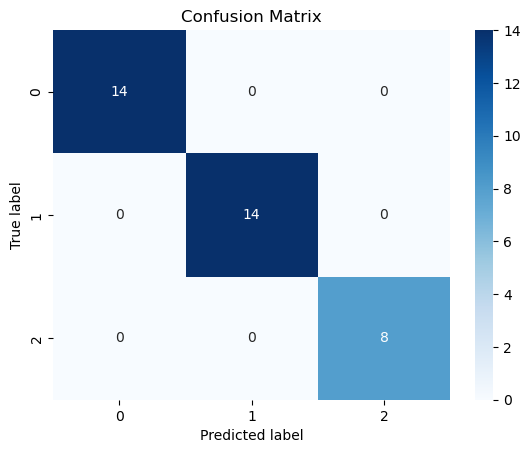

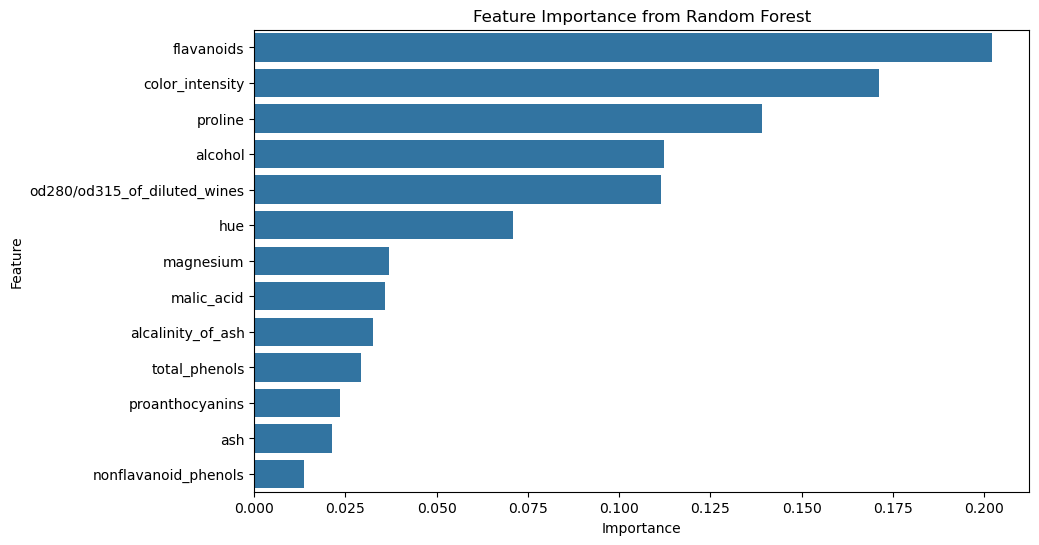

选择后模型的准确率: 0.9722222222222222
选择后模型的F1得分: 0.9717752234993614


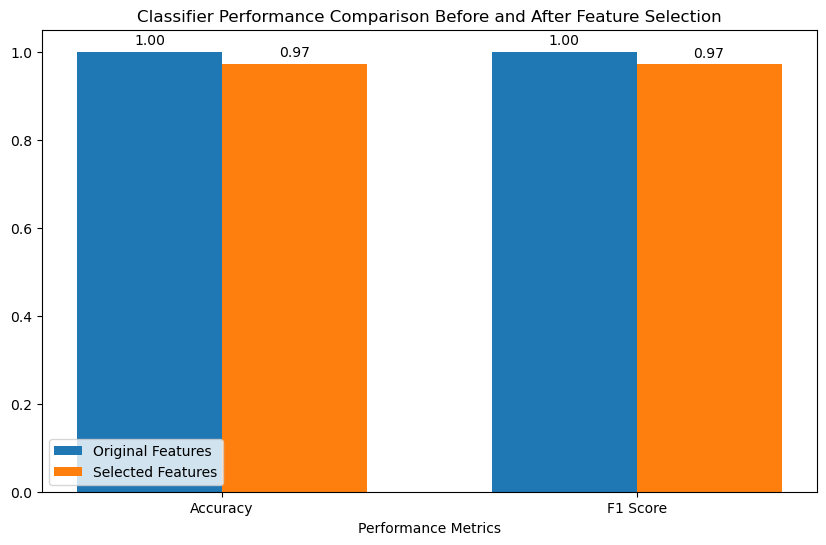

In [1]:
# 步骤一：导入所需模块
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
import numpy as np

# 步骤二：导入数据集，并分割为特征和标签
wine = load_wine()
X = wine.data
y = wine.target

# 步骤三：划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)

# 步骤四：定义随机森林分类器并进行参数优化
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("最佳参数:", grid_search.best_params_)

# 步骤五：使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 步骤六：打印出分类器的混淆矩阵
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:\n", conf_matrix)

# 绘制混淆矩阵热力图
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 步骤七：获取特征重要性并排序可视化
feature_importances = best_model.feature_importances_
feature_names = wine.feature_names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# 步骤八：进行特征选择
selector = SelectFromModel(best_model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 步骤九：使用选择后的特征训练模型并评估
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print("选择后模型的准确率:", accuracy_selected)
print("选择后模型的F1得分:", f1_selected)

# 步骤十：绘制性能对比图
performance_metrics = ['Accuracy', 'F1 Score']
original_performance = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
selected_performance = [accuracy_selected, f1_selected]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(performance_metrics))

bar1 = ax.bar(index, original_performance, bar_width, label='Original Features')
bar2 = ax.bar(index + bar_width, selected_performance, bar_width, label='Selected Features')

ax.set_xlabel('Performance Metrics')
ax.set_title('Classifier Performance Comparison Before and After Feature Selection')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(performance_metrics)
ax.legend()

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('%.2f' % height, xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

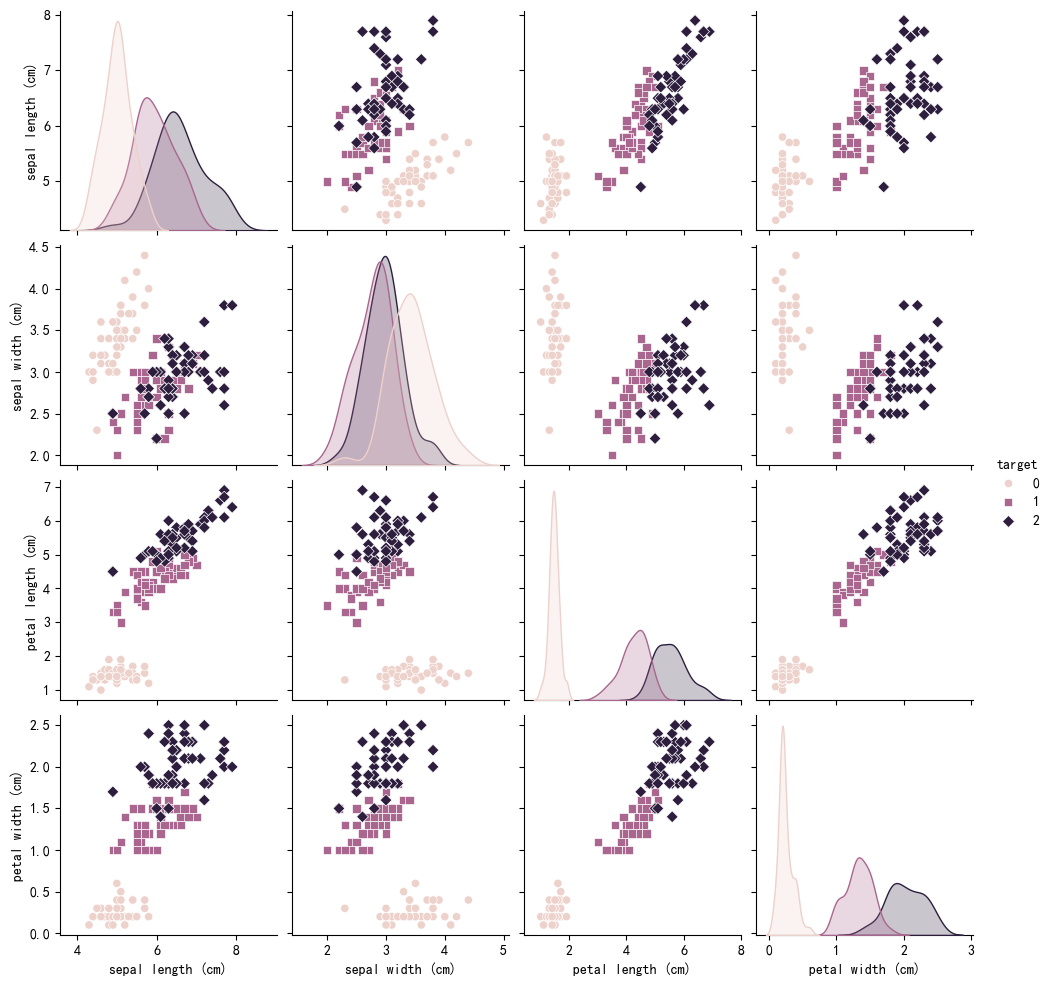

XGBoost最佳参数: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
LightGBM最佳参数: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
XGBoost分类器 - 准确率: 1.0, F1得分: 1.0
LightGBM分类器 - 准确率: 1.0, F1得分: 1.0


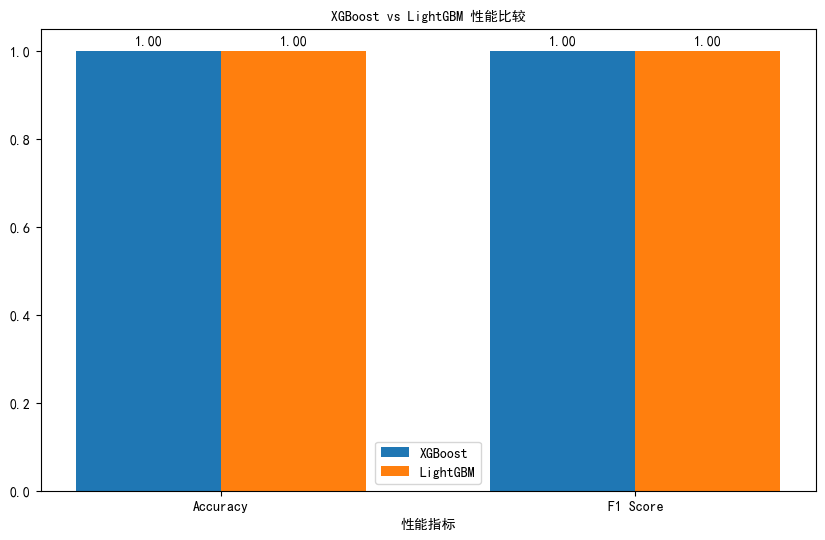

In [2]:
# 步骤一：导入需要的库文件及数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.font_manager as fm

# 设置中文字体，解决显示中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统的字体路径
my_font = fm.FontProperties(fname=font_path)

# 步骤二：加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

# 将数据转换为DataFrame便于查看
df = pd.DataFrame(X, columns=features)
df['target'] = y

# 步骤三：对数据进行初步探索，包括查看数据的基本信息和可视化特征之间的关系
print(df.info())
print(df.describe())

# 可视化特征之间的关系
sns.pairplot(df, hue="target", markers=["o", "s", "D"])
plt.show()

# 步骤四：将数据集分为训练集和测试集，按8:2的比例划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 步骤五：对选定的分类方法（XGBoost和LightGBM）进行参数优化
# 1. XGBoost参数优化
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=3)
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_
print(f"XGBoost最佳参数: {xgb_grid_search.best_params_}")

# 2. LightGBM参数优化
# 使用 verbosity=-1 来消除警告
lgb_model = lgb.LGBMClassifier(random_state=42, verbosity=-1)

# LightGBM参数优化
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.3]
}

lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, scoring='accuracy', cv=3)
lgb_grid_search.fit(X_train, y_train)

lgb_best_model = lgb_grid_search.best_estimator_
print(f"LightGBM最佳参数: {lgb_grid_search.best_params_}")

# 步骤六：使用测试集进行预测，并将结果保存下来
xgb_y_pred = xgb_best_model.predict(X_test)
lgb_y_pred = lgb_best_model.predict(X_test)

# 保存结果到CSV文件
pd.DataFrame({'XGBoost预测结果': xgb_y_pred, 'LightGBM预测结果': lgb_y_pred}).to_csv('classification_results.csv', index=False)

# 步骤七：分别比较参数优化前后及特征选择前后两个不同分类器的性能
# 对XGBoost分类器的性能评估
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred, average='weighted')
print(f"XGBoost分类器 - 准确率: {xgb_accuracy}, F1得分: {xgb_f1}")

# 对LightGBM分类器的性能评估
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_f1 = f1_score(y_test, lgb_y_pred, average='weighted')
print(f"LightGBM分类器 - 准确率: {lgb_accuracy}, F1得分: {lgb_f1}")

# 步骤八：对比较结果进行可视化
performance_metrics = ['Accuracy', 'F1 Score']
xgb_performance = [xgb_accuracy, xgb_f1]
lgb_performance = [lgb_accuracy, lgb_f1]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(performance_metrics))

bar1 = ax.bar(index, xgb_performance, bar_width, label='XGBoost')
bar2 = ax.bar(index + bar_width, lgb_performance, bar_width, label='LightGBM')

ax.set_xlabel('性能指标', fontproperties=my_font)
ax.set_title('XGBoost vs LightGBM 性能比较', fontproperties=my_font)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(performance_metrics, fontproperties=my_font)
ax.legend()

# 在柱状图上标注数值
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('%.2f' % height, xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()